## Clustering in the `original image space`
As the clustering is the first thing that pop in to my head let's try clustering the images in the original image space. If this technique does not work well, we will use fancier techniques of embedding clustering and see what happend with it


In [1]:
import os 
import numpy as np
from skimage import io
np.random.seed(0)

In [2]:
# path = './EyesDataset/Train/'
# for i in os.listdir(path):
#   name = i.split('.')
#   name.insert(1, '_0')
#   name.insert(2,'.')
#   name = ''.join(name)
# #   print(name)
# #   os.rename(path+i,path+name)

In [3]:
def unpackData(path):
  train_data = np.empty((len(os.listdir(path)), 24*24))
  train_label = np.empty((len(os.listdir(path)), 1))
  
  for j,i in enumerate(os.listdir(path)):
      label = i.split('.')[0]
      label = int(label.split('_')[1])
      img = io.imread(path+i)/255
      train_data[j,:] = img.reshape((1, 24*24))
      train_label[j] = label
  out = np.concatenate((train_data, train_label), axis=1)
  np.random.shuffle(out)
  return out

In [4]:
def score(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    return {'accuracy': acc, 'f1 score': f1}

###  Data Preporation

In [39]:
path_tr = './EyesDataset/train/'
path_ts = './EyesDataset/test/'

X_train = unpackData(path_tr)
X_test  = unpackData(path_ts)

x_train, y_train = X_train[:,:-1], X_train[:,-1]
x_test, y_test = X_test[:,:-1], X_test[:,-1]

### K-means clustering  - original space

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score

model = KMeans(init='k-means++', n_clusters = 2, n_init = 10, random_state=0)

In [14]:
model.fit(x_train)

KMeans(n_clusters=2, random_state=0)

In [15]:
score(y_train, model.labels_ )

{'accuracy': 0.619536598209584, 'f1 score': 0.6174212337834261}

In [16]:
score(y_test, model.predict(x_test))

{'accuracy': 0.605, 'f1 score': 0.6146341463414634}

In [17]:
fpr, tpr, threshold = roc_curve(y_train, model.predict(x_train), pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

In [18]:
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.41295746785361026

In [19]:
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.34346846846846846

In [20]:

fpr, tpr, threshold = roc_curve(y_test, model.predict(x_test), pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

In [21]:
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.4528301886792453

In [22]:
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.32978723404255317

### AgglomerativeClustering

In [416]:
model = AgglomerativeClustering()
model.fit(np.concatenate((x_trian, x_test)))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [417]:
score(np.concatenate((y_train,y_test)), model.labels_)

{'accuracy': 0.4946236559139785, 'f1 score': 0.33234225305583087}

### PCA approch


In [29]:
from sklearn.decomposition import PCA
for i in range(10, 500, 30):
  model = KMeans(init='k-means++', n_clusters = 2, n_init=20, random_state=0)
  red = PCA(n_components=i, random_state=0).fit(x_train)
  model.fit(red.transform(x_train))
  print(f'PCA components: [{[i]}/{500}]')
  print(score(y_train, model.predict(red.transform(x_train))), score(y_test, model.predict(red.transform(x_test))))
  print('--'*10)

PCA components: [[10]/500]
{'accuracy': 0.6203264876250658, 'f1 score': 0.6195250659630606} {'accuracy': 0.61, 'f1 score': 0.6213592233009708}
--------------------
PCA components: [[40]/500]
{'accuracy': 0.6203264876250658, 'f1 score': 0.6195250659630606} {'accuracy': 0.61, 'f1 score': 0.6213592233009708}
--------------------
PCA components: [[70]/500]
{'accuracy': 0.3796735123749342, 'f1 score': 0.3382022471910112} {'accuracy': 0.39, 'f1 score': 0.32967032967032966}
--------------------
PCA components: [[100]/500]
{'accuracy': 0.3796735123749342, 'f1 score': 0.3382022471910112} {'accuracy': 0.39, 'f1 score': 0.32967032967032966}
--------------------
PCA components: [[130]/500]
{'accuracy': 0.3796735123749342, 'f1 score': 0.3382022471910112} {'accuracy': 0.39, 'f1 score': 0.32967032967032966}
--------------------
PCA components: [[160]/500]
{'accuracy': 0.3796735123749342, 'f1 score': 0.3382022471910112} {'accuracy': 0.39, 'f1 score': 0.32967032967032966}
--------------------
PCA compo

In [419]:
score(y_train, model.predict(red.transform(x_train))), score(y_test, model.predict(red.transform(x_test)))

({'accuracy': 0.6380626480652803, 'f1 score': 0.650926631124651},
 {'accuracy': 0.625, 'f1 score': 0.6445497630331753})

In [31]:
model = KMeans(init='k-means++', n_clusters = 2, n_init=20, random_state=0)
red = PCA(n_components=300, random_state=0).fit(x_train)
model.fit(red.transform(x_train))

KMeans(n_clusters=2, n_init=20, random_state=0)

In [33]:
from sklearn.manifold import TSNE

x_train_pca = red.transform(x_train)
X_train_tsne = TSNE(n_components=2).fit_transform(x_train_pca)

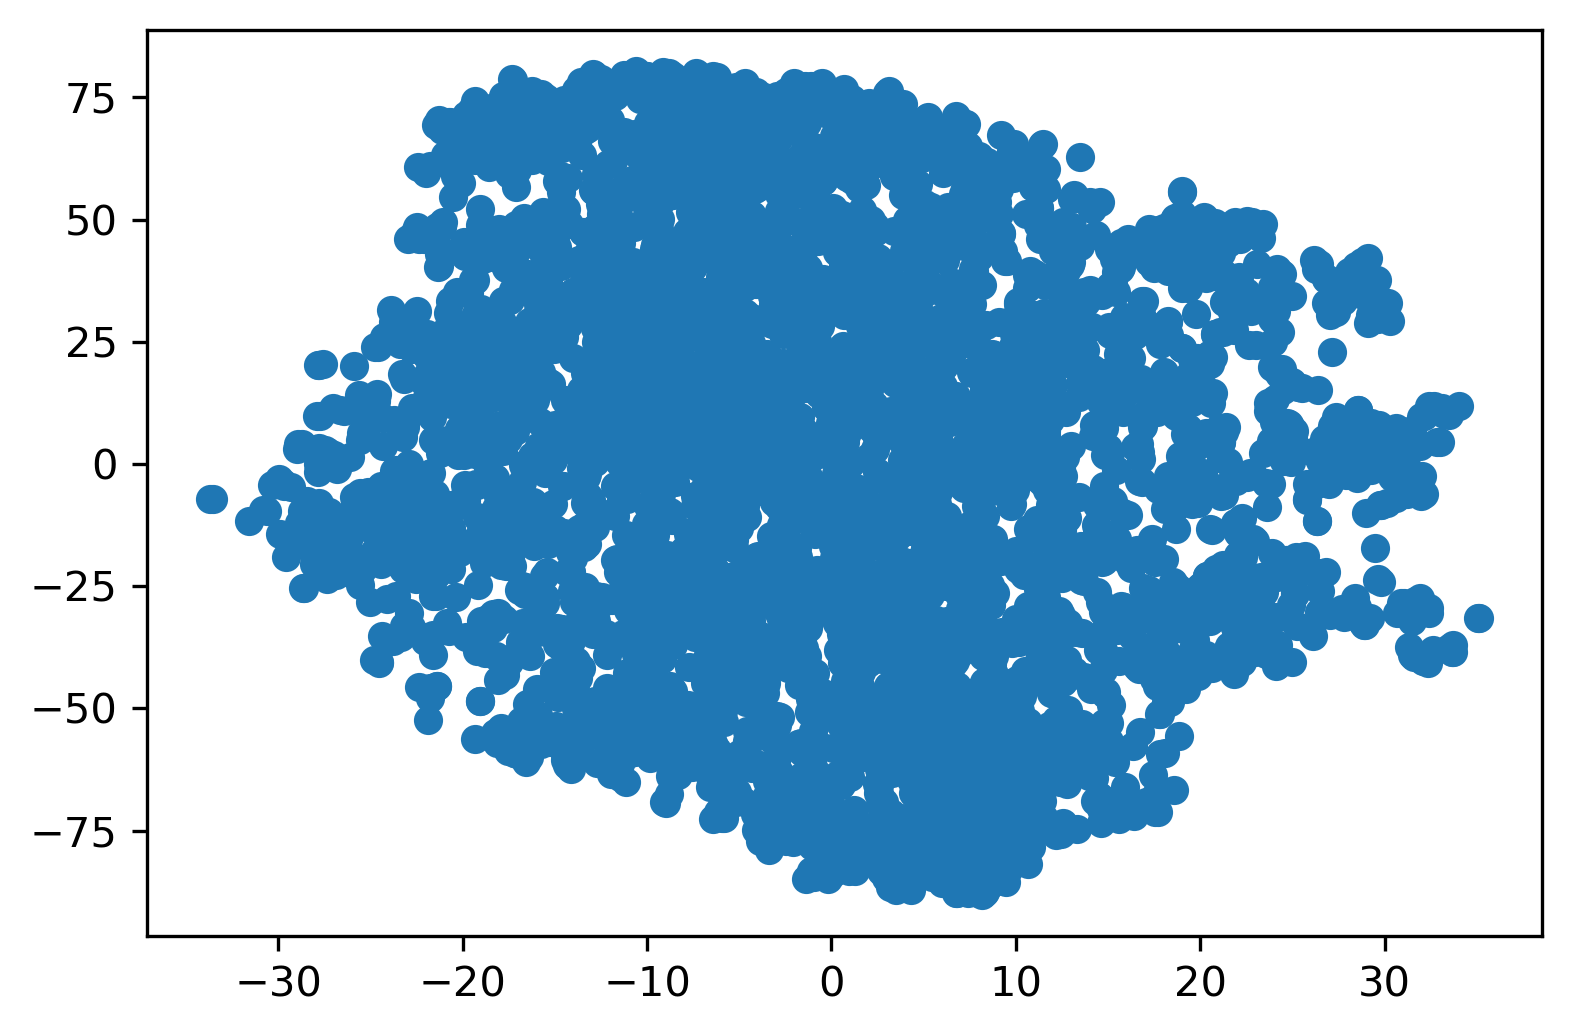

In [36]:
import matplotlib.pyplot as plt


plt.figure(dpi=300)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### SVD approach



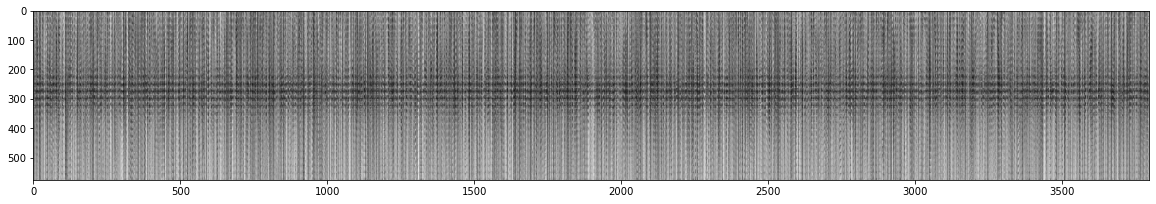

In [42]:
import matplotlib.pyplot as plt 
from sklearn import decomposition

dims = (24,24)
plt.figure(figsize=(20,10))
plt.imshow(x_train.T, cmap='gray')

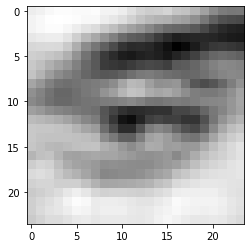

In [43]:
plt.imshow(np.reshape(x_train[10,:], dims), cmap='gray')

In [57]:
u, s, v = decomposition.randomized_svd(x_train, 5)

In [58]:
u.shape, s.shape, v.shape

((3798, 5), (5,), (5, 576))

In [59]:
low_rank = u @ np.diag(s) @ v

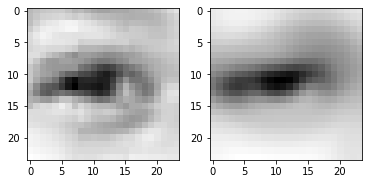

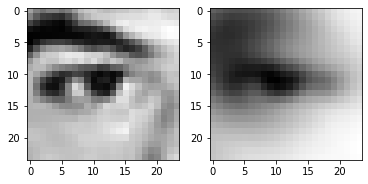

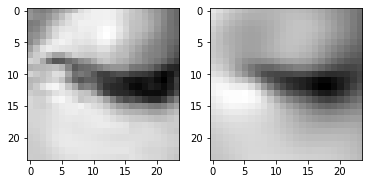

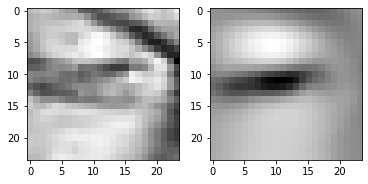

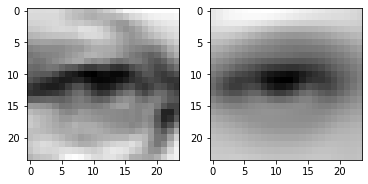

In [61]:
img = 100
for img in range(100, 110, 2):
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(x_train[img,:], dims), cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(low_rank[img,:], dims), cmap='gray')
  plt.show()

In [66]:
out = {'acc': 0, 'f1': 0, 'comp': 0}
for i in range(2, x_train.shape[1], 20):
  u, s, v = decomposition.randomized_svd(x_train, i)
  low_rank = u @ np.diag(s) @ v
  model = KMeans(init='k-means++', n_clusters = 2, n_init = 50, random_state=0)
  model.fit(low_rank)
  res = score(y_train, model.labels_)
  if out['acc'] < res['accuracy']:
    out['acc'] = res['accuracy']
    out['f1'] = res['f1 score']
    out['comp'] = i
  print(i)

2
22
42
62
82
102
122
142
162
182
202
222
242
262
282
302
322
342
362
382
402
422
442
462
482
502
522
542
562


In [67]:
out


{'acc': 0.6208530805687204, 'f1': 0.6198521647307285, 'comp': 22}

In [68]:
u, s, v = decomposition.randomized_svd(x_train, 22)
low_rank = u @ np.diag(s) @ v
model = KMeans(init='k-means++', n_clusters = 2, n_init = 50, random_state=0)
model.fit(low_rank)
score(y_train, model.labels_)

{'accuracy': 0.6208530805687204, 'f1 score': 0.6198521647307285}

In [69]:
u, s, v = decomposition.randomized_svd(x_test, 22)
low_rank_test = u @ np.diag(s) @ v

In [70]:
score(y_test, model.predict(low_rank_test))

{'accuracy': 0.61, 'f1 score': 0.6213592233009708}

## Clustering in an `embedding space` 

The best i achieved by clustering in the original space was `{'accuracy': 0.625, 'f1 score': 0.6445497630331753}` on validation set. Let try now using fancier features than just row pixels

In [22]:
import os
import torch
import torch.nn as nn 
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics


# from tqdm import tqdm

In [9]:
path_tr = './EyesDataset/train/'
path_ts = './EyesDataset/test/'

model = models.resnet34(pretrained=True)
model.fc = nn.Identity()

In [10]:
class myData(Dataset):
    def __init__(self, pathToImgs, transforms=None):
        self.pathToImgs = pathToImgs
        self.imgNames = os.listdir(pathToImgs)
        self.transforms = transforms
    
    def __len__(self):
        return len(self.imgNames)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
          idx = idx.tolist()
        
        img_name = os.path.join(self.pathToImgs, self.imgNames[idx])
        image = Image.open(img_name)
        label = self.imgNames[idx].split('.')[0]
        label = torch.tensor(int(label.split('_')[1]))
        
        if self.transforms:
            image = self.transforms(image)
            image = torch.cat(3*[image])
        else: 
            transform = transforms.Compose([transforms.Resize((224,224)),
                                            transforms.ToTensor() ])
            image = transform(image)
            image = torch.cat(3*[image])
            
        return image, label

In [23]:
def score(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    return {'accuracy': acc, 'f1 score': f1}

In [11]:
x_train = np.empty((len(os.listdir(path_tr)), 512))
y_train = np.empty((len(os.listdir(path_tr)), 1))

In [12]:
x_test = np.empty((len(os.listdir(path_ts)), 512))
y_test = np.empty((len(os.listdir(path_ts)), 1))

In [13]:
model.eval()
with torch.no_grad():
  for i, batch in enumerate(myData(path_tr)):
      img, label = batch
      x_train[i,:] = model(img.unsqueeze_(0)).detach().numpy()
      y_train[i] = label.item()

In [14]:
model.eval()
with torch.no_grad():
  for i, batch in enumerate(myData(path_ts)):
      img, label = batch
      x_test[i,:] = model(img.unsqueeze_(0)).detach().numpy()
      y_test[i] = label.item()

In [30]:
kmeans = KMeans(init='k-means++', n_clusters = 2, max_iter=600, n_init = 50, random_state=0)
kmeans.fit(x_train)

KMeans(max_iter=600, n_clusters=2, n_init=50, random_state=0)

In [31]:
score(y_train, kmeans.labels_)

{'accuracy': 0.6090047393364929, 'f1 score': 0.6074544012688342}

In [32]:
 score(y_test, kmeans.predict(x_test))

{'accuracy': 0.605, 'f1 score': 0.6220095693779905}